In [38]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scikitplot as skplt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import string
from keras.preprocessing.text import Tokenizer

In [94]:
#import data and add header row

toxic = pd.read_csv("toxic/train.csv")

#let's work with just 5000 examples

toxic = toxic[0:10000]
toxic.shape


(10000, 8)

In [95]:
#lowercase text and removing punctuation in title to have smaller size of model in future

def normalize(s):
    s = s.lower()
    s = s.translate(str.maketrans('','', string.punctuation))
    s = s.replace('\n', ' ')
    return s

toxic['comment_text'] = [normalize(s) for s in toxic['comment_text']]

X = toxic["comment_text"].values 
y = toxic[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values


In [96]:
#https://keras.io/preprocessing/text/
#need to tokenize text first
max_words = 20000
tokenizer = Tokenizer(num_words=max_words, char_level=True, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',)
tokenizer.fit_on_texts(X) 
tokenized_X = tokenizer.texts_to_matrix(X, mode='freq')

In [97]:
X_train, X_test, y_train, y_test = train_test_split(tokenized_X, y, random_state=42)
print(X_train.shape)
print(X_test.shape)

(7500, 20000)
(2500, 20000)


In [103]:
# building a model
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD


model = Sequential()
model.add(Dense(1000, input_shape=(max_words,), activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(500, input_shape=(max_words,), activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(6, activation='sigmoid'))


In [68]:
# sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

In [104]:
model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [105]:
history = model.fit(X_train, y_train, epochs=10, batch_size=300, validation_data=(X_test, y_test))

Train on 7500 samples, validate on 2500 samples
Epoch 1/10
7500/7500 [==============================] - 16s 2ms/step - loss: 0.3761 - acc: 0.9504 - val_loss: 0.1537 - val_acc: 0.9659
Epoch 2/10
7500/7500 [==============================] - 15s 2ms/step - loss: 0.1552 - acc: 0.9623 - val_loss: 0.1347 - val_acc: 0.9659
Epoch 3/10
7500/7500 [==============================] - 15s 2ms/step - loss: 0.1434 - acc: 0.9623 - val_loss: 0.1293 - val_acc: 0.9659
Epoch 4/10
7500/7500 [==============================] - 15s 2ms/step - loss: 0.1409 - acc: 0.9623 - val_loss: 0.1272 - val_acc: 0.9659
Epoch 5/10
7500/7500 [==============================] - 15s 2ms/step - loss: 0.1376 - acc: 0.9623 - val_loss: 0.1244 - val_acc: 0.9659
Epoch 6/10
7500/7500 [==============================] - 15s 2ms/step - loss: 0.1342 - acc: 0.9623 - val_loss: 0.1211 - val_acc: 0.9659
Epoch 7/10
7500/7500 [==============================] - 15s 2ms/step - loss: 0.1285 - acc: 0.9623 - val_loss: 0.1171 - val_acc: 0.9663
Epoch 8

In [106]:
# evaluate model

scores = model.evaluate(X_test, y_test)
print(scores)

2500/2500 [==============================] - 2s 831us/step
[0.10849300267696381, 0.9682666625976563]


In [107]:
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

2500/2500 [==============================] - 2s 832us/step

acc: 96.83%


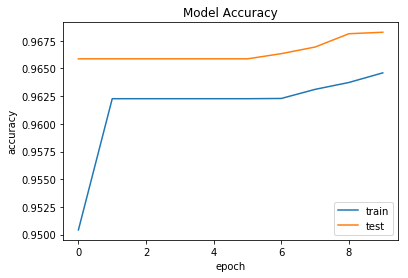

In [108]:
# plot accuracy
from keras.callbacks import ModelCheckpoint

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

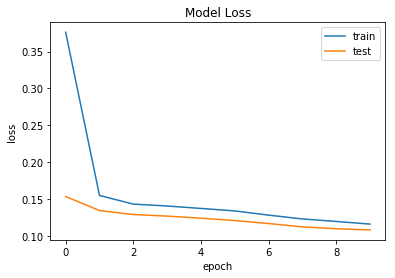

In [109]:
# plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [59]:

preds = model.predict(X_test)
#preds[preds>=0.5] = 1
#preds[preds<0.5] = 0
print(preds)

[[0.09604979 0.01288417 0.0468954  0.01082372 0.04987172 0.01316669]
 [0.09696156 0.01316931 0.04767552 0.01108106 0.05056494 0.01343228]
 [0.09480182 0.01244546 0.04588728 0.01044234 0.04895165 0.01271247]
 ...
 [0.09540381 0.01272108 0.04657019 0.0106778  0.04952941 0.01298003]
 [0.09596185 0.01286475 0.04689379 0.01080645 0.04985707 0.01314283]
 [0.09576818 0.01281248 0.04678234 0.01076717 0.04975319 0.01309581]]
